#**DSP Project**
#**Spandan Vishal Roll No.-204102315**

In [4]:
#importing Libraries

import numpy as np
import scipy.io as sio
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import statistics


#Loading Dataset
data = sio.loadmat('original_ECG.mat')
ecg=np.array(data['original'][0])

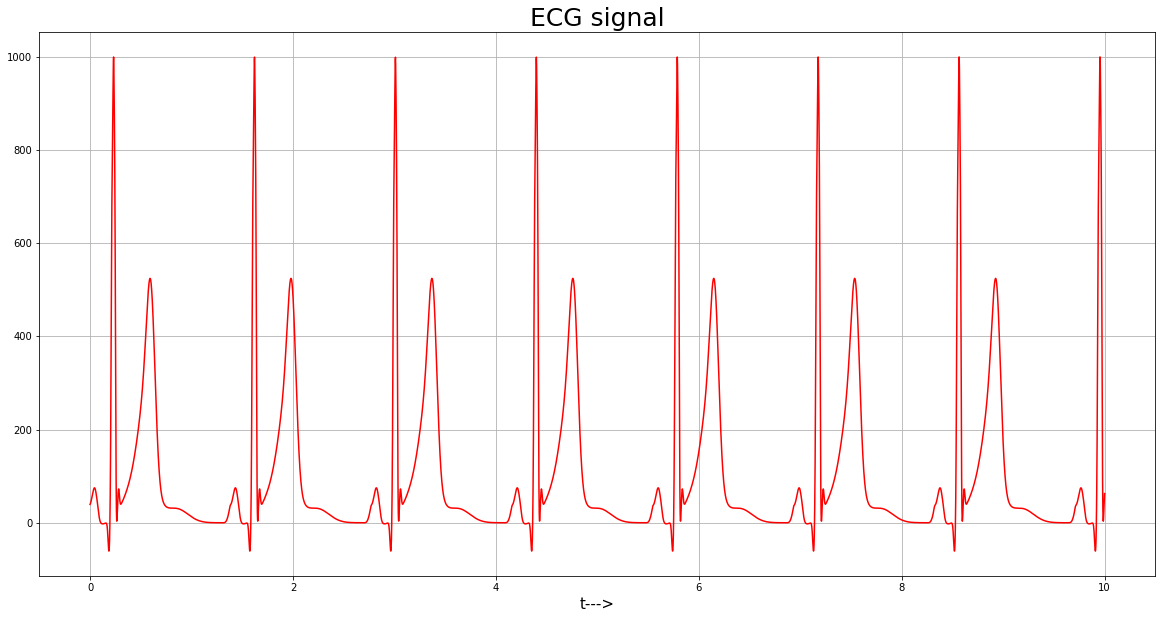

In [16]:
f_s=1000 #Sampling Frequency


plt.figure(1,figsize=(20,10))
x=np.linspace(0,len(ecg)*0.001,len(ecg))
plt.plot(x,ecg,'red')
plt.title("ECG signal", fontsize=25)
plt.xlabel("t--->",fontsize=15)
plt.grid(True)

#Peak Detection of ECG

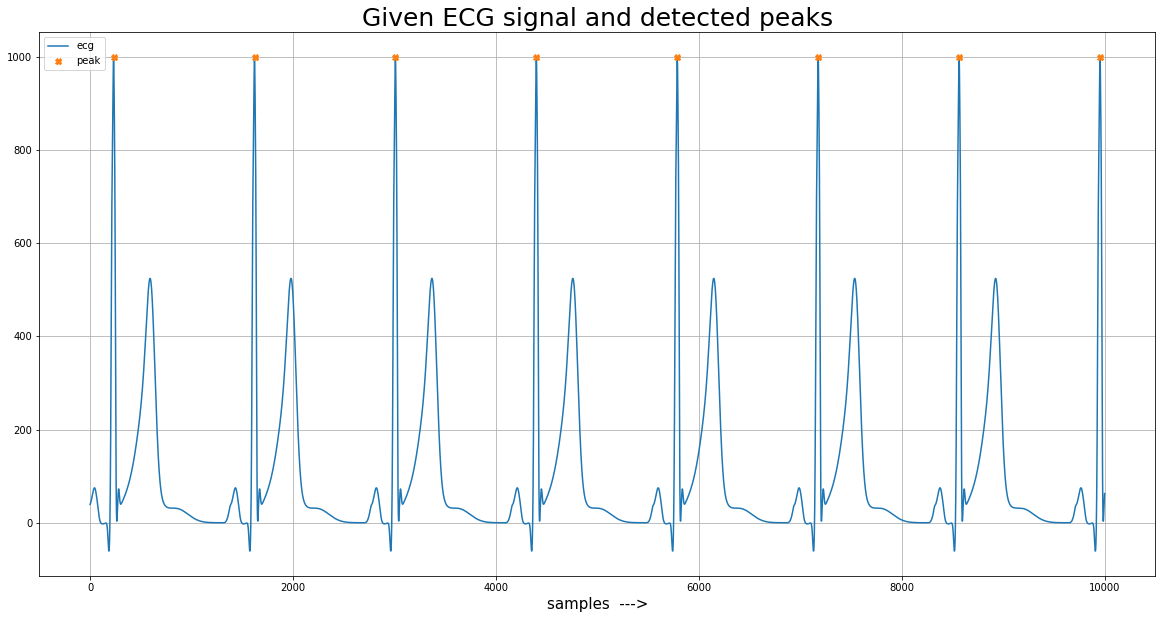

In [15]:
#peak detection
peaks,_= find_peaks(ecg, height=800)

#plot of ecg signal with peaks
plt.figure(1,figsize=(20,10))
T=1.0/1000
plt.plot(ecg)
plt.plot(peaks, ecg[peaks], "X")
plt.grid(True)
plt.title("Given ECG signal and detected peaks",fontsize=25)
plt.legend(["ecg","peak"])
plt.xlabel("samples  --->",fontsize=15)
plt.show()

#RR interval for different beats 

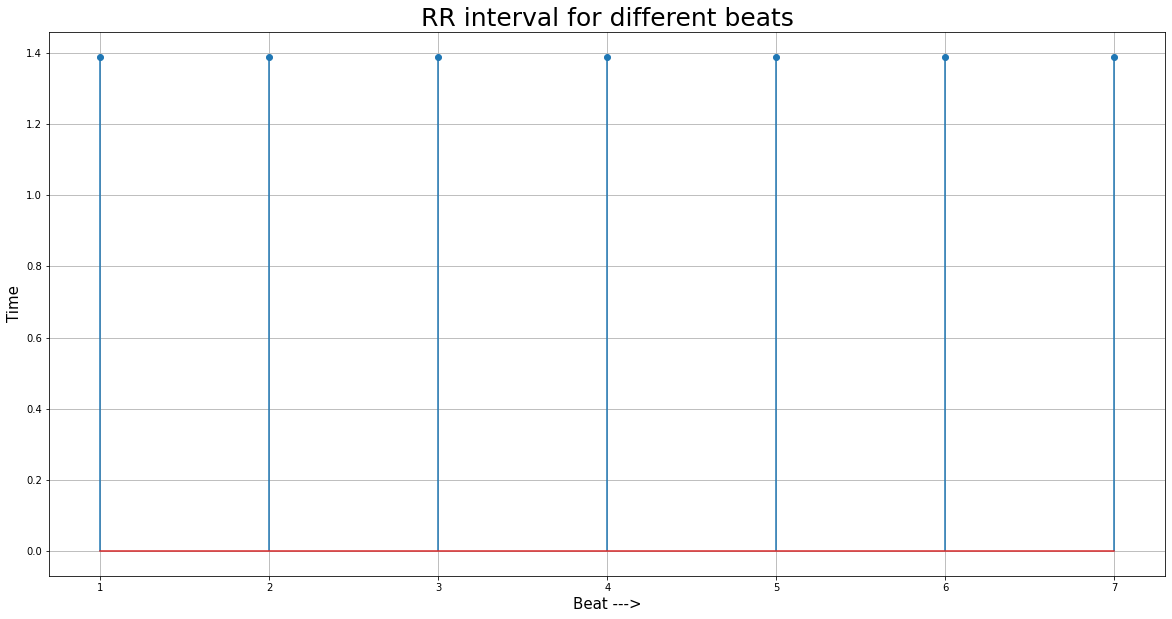

In [14]:
rr=[] #list for storing rr intervals
for i in range(1,len(peaks)):
  rr.append(peaks[i]-peaks[i-1])
rr_sec = [x /1000 for x in rr]

x=np.arange(1,8)
plt.figure(1,figsize=(20,10))
plt.stem(x,rr_sec,use_line_collection=True)
plt.title("RR interval for different beats",fontsize=25)
plt.xlabel("Beat --->",fontsize=15)
plt.ylabel("Time",fontsize=15)
plt.grid(True)

#RR wave

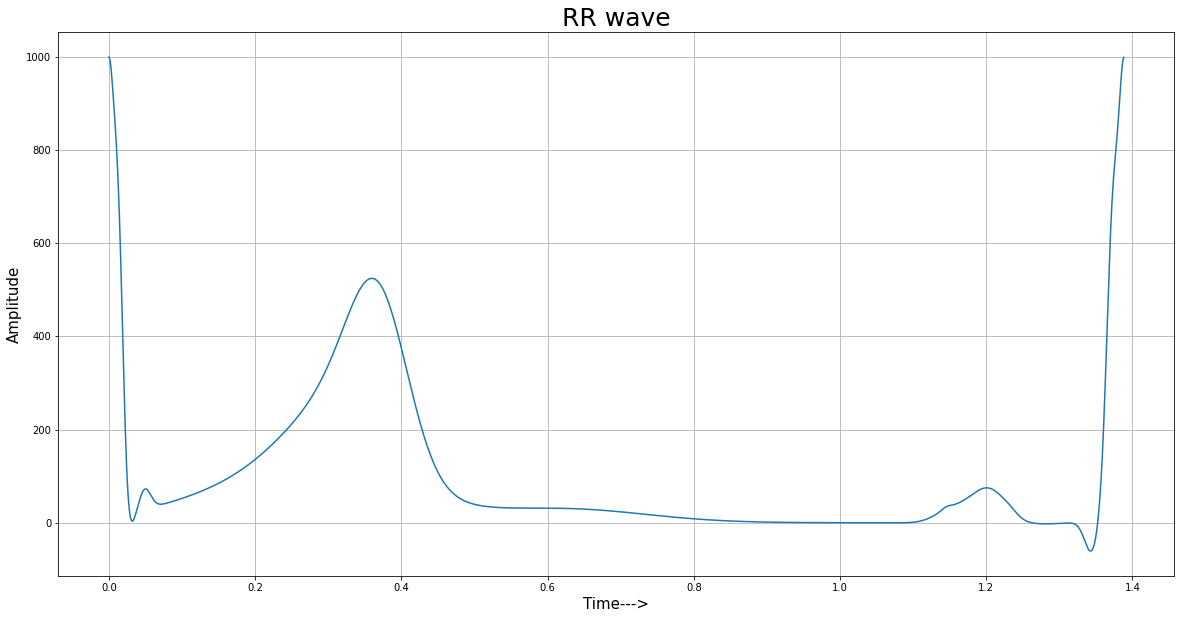

In [18]:
#First RR wave
s=[]
for i in range(peaks[0],peaks[1]):
  s.append(ecg[i])

T=1.0/1000
t=np.arange(0,len(s)*T,T)
plt.figure(1,figsize=(20,10))
plt.plot(t,s)
plt.title("RR wave",fontsize=25)
plt.xlabel("Time--->",fontsize=15)
plt.ylabel("Amplitude",fontsize=15)
plt.grid(True)

#Synchronous averaging

##Percentage mean square difference formula used:
* $PRD=100*{\sqrt{\frac{\displaystyle\sum_{n=0}^{N-1}(x_{original}[n]-x_{filtered}[n])^2}{\displaystyle\sum_{n=0}^{N-1}x_{original}[n]^2}}}$


Text(0.5, 0, 'Iteration --->')

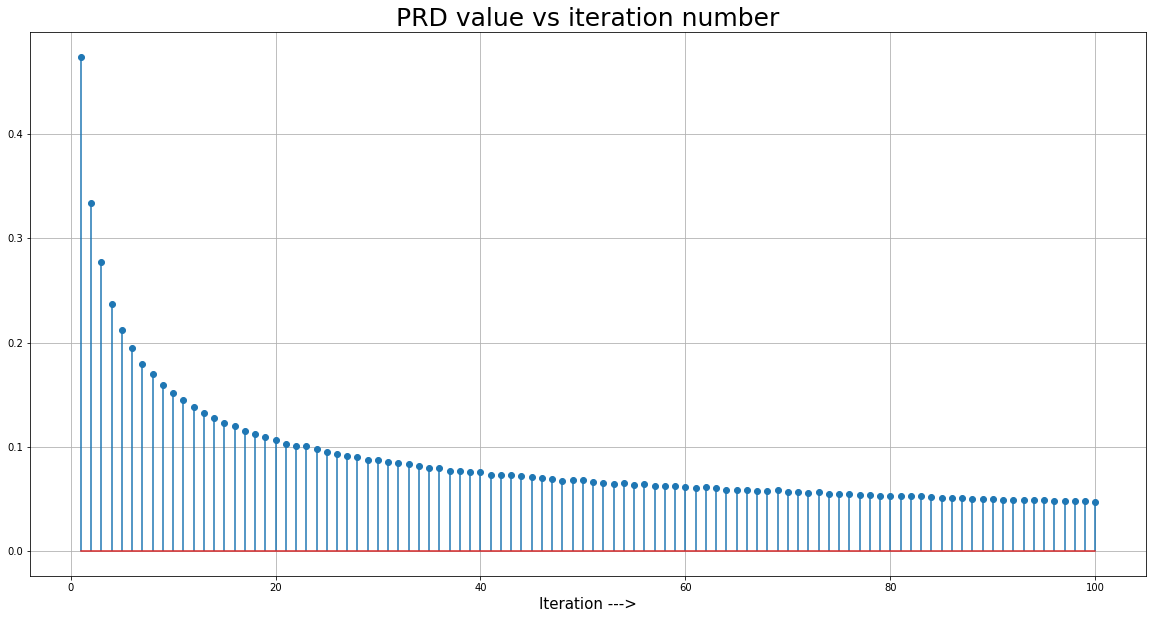

In [20]:
prd=np.zeros(100)
for i in range(100):
  x=np.zeros_like(ecg)
  ecg_filtered=0
  for j in range(i+1):
    x=x+(ecg+np.random.normal(0, 1, ecg.shape))/(i+1)  #synchronous averaging after applying random noise
  prd[i]=100*(np.sqrt(np.sum((x-ecg)**2)/np.sum(ecg**2)))

t=np.arange(1,101)
plt.figure(1,figsize=(20,10))
plt.stem(t,prd,use_line_collection=True)
plt.grid(True)
plt.title("PRD value vs iteration number",fontsize=25)
plt.xlabel("Iteration --->",fontsize=15)

#Power Line interference in ECG Signal

The prd value is 4.497129250089887


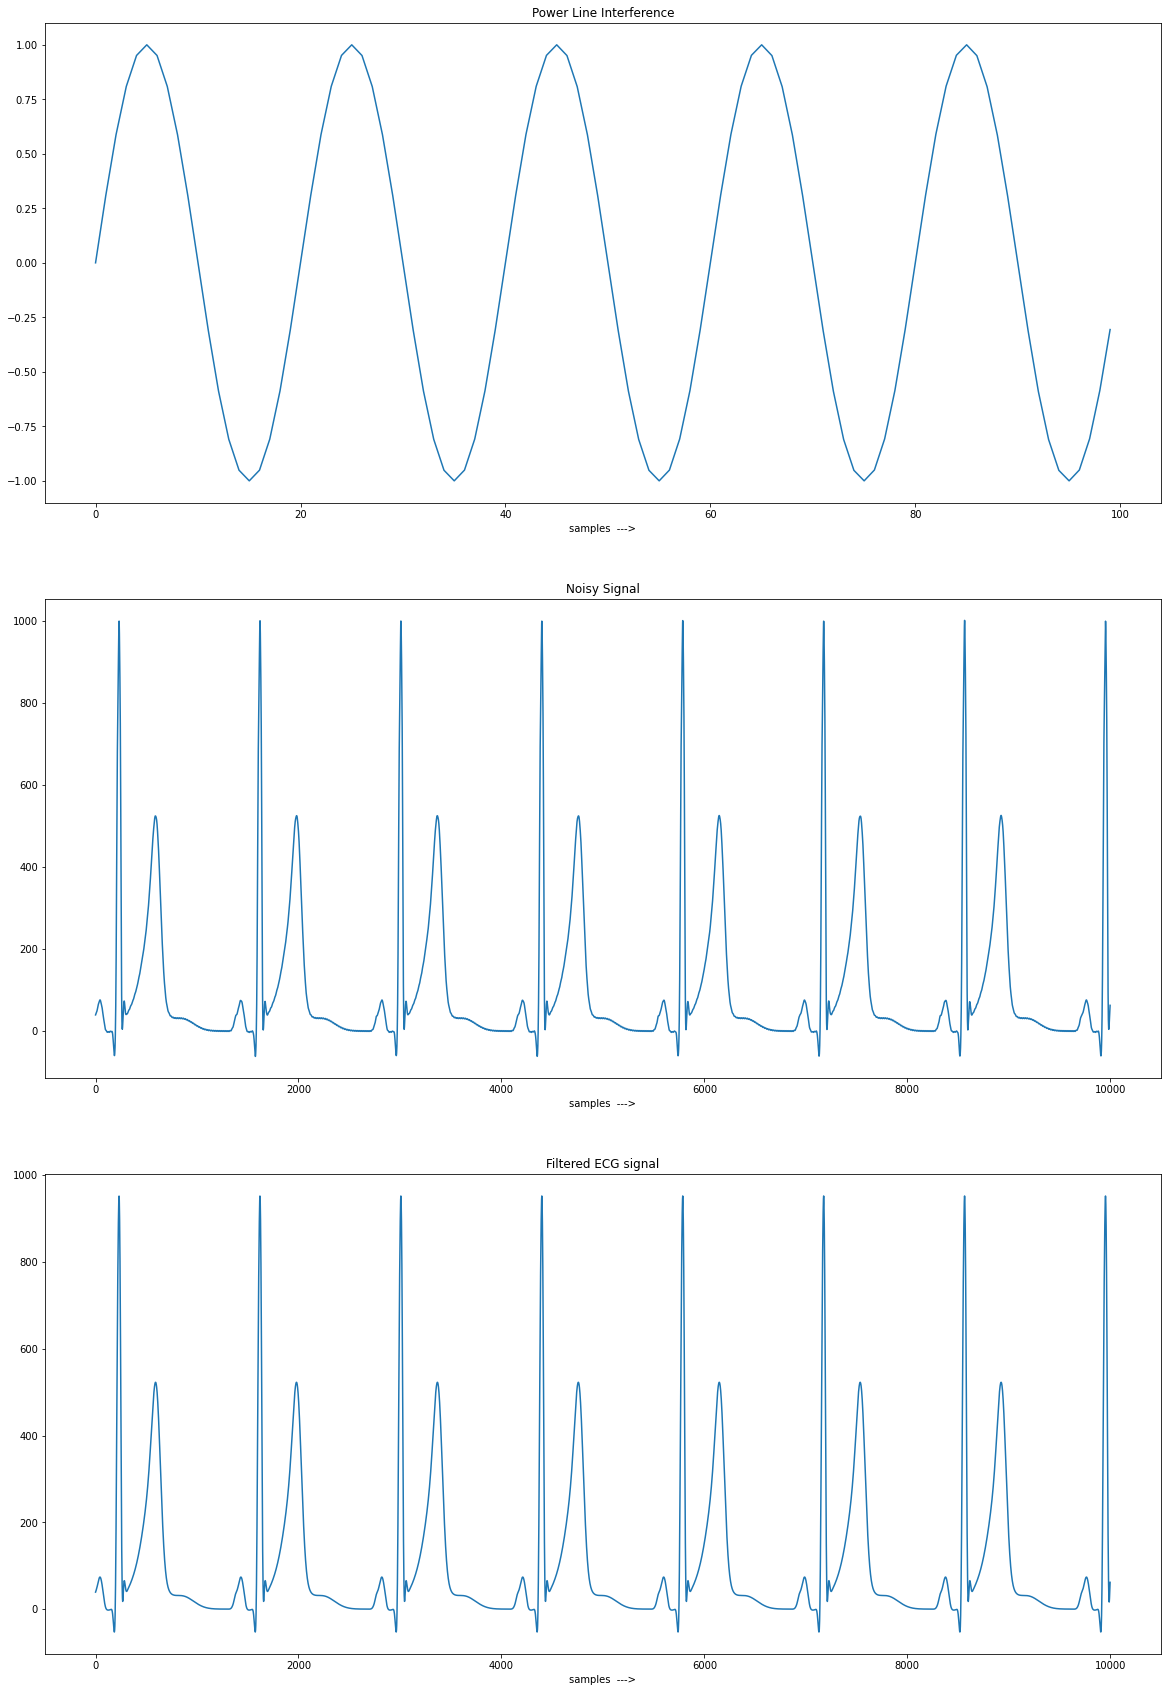

In [29]:
import scipy.signal

fs=1000

t=np.linspace(0,10,10000)
#2*(max(ecg)-min(ecg))*
powerline_int=np.sin(2*np.pi*50*t)
noisy_ecg=ecg+powerline_int
plt.figure(1,figsize=(20,30))
plt.subplot(3,1,1)
plt.plot(powerline_int[0:100])
plt.title("Power Line Interference")
plt.xlabel("samples  --->")

plt.subplot(3,1,2)
plt.plot(noisy_ecg)
plt.title("Noisy Signal")
plt.xlabel("samples  --->")


b,a=scipy.signal.iirnotch(50, 1, fs=fs)
output_signal=scipy.signal.filtfilt(b,a,noisy_ecg)
plt.subplot(3,1,3)
plt.plot(output_signal)
plt.title("Filtered ECG signal")
plt.xlabel("samples  --->")

prd=np.sqrt(np.sum((output_signal-ecg)**2)/np.sum(ecg**2))*100
print("The prd value is",prd)


##Mean Median Filtering

In [22]:
#Mean Median Filter

def mean_median(x,N,alpha):
  i=0
  x=np.pad(x,(0,N),'constant')
  mean_med = []
  while i<len(x)-N:
    window=x[i:i+N]
    #get current window
    window_med=statistics.median(window)
    window_mean=statistics.mean(window)
    y=(1-alpha)*window_mean+alpha*window_med
    mean_med.append(y)
    i+=1
  return mean_med


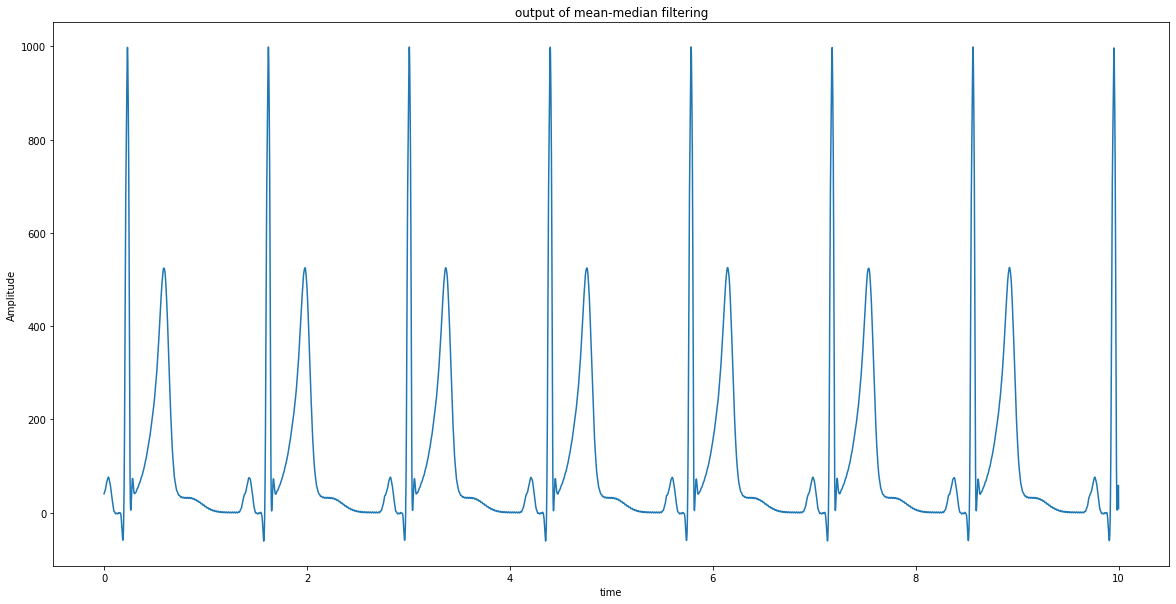

PRD value of mean_median filter is:   3.8061657952287034


In [36]:
filtered_out1=mean_median(noisy_ecg,3,.6)
plt.figure(1,figsize=(20,10))
plt.plot(t,filtered_out1)  #[0:3000]
plt.title("output of mean-median filtering")
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.show()
prd=np.sqrt(np.sum((filtered_out1-ecg)**2)/np.sum(ecg**2))*100
print("PRD value of mean_median filter is:  ",prd)

PRD value of mean_median filter is:   3.852230028424539


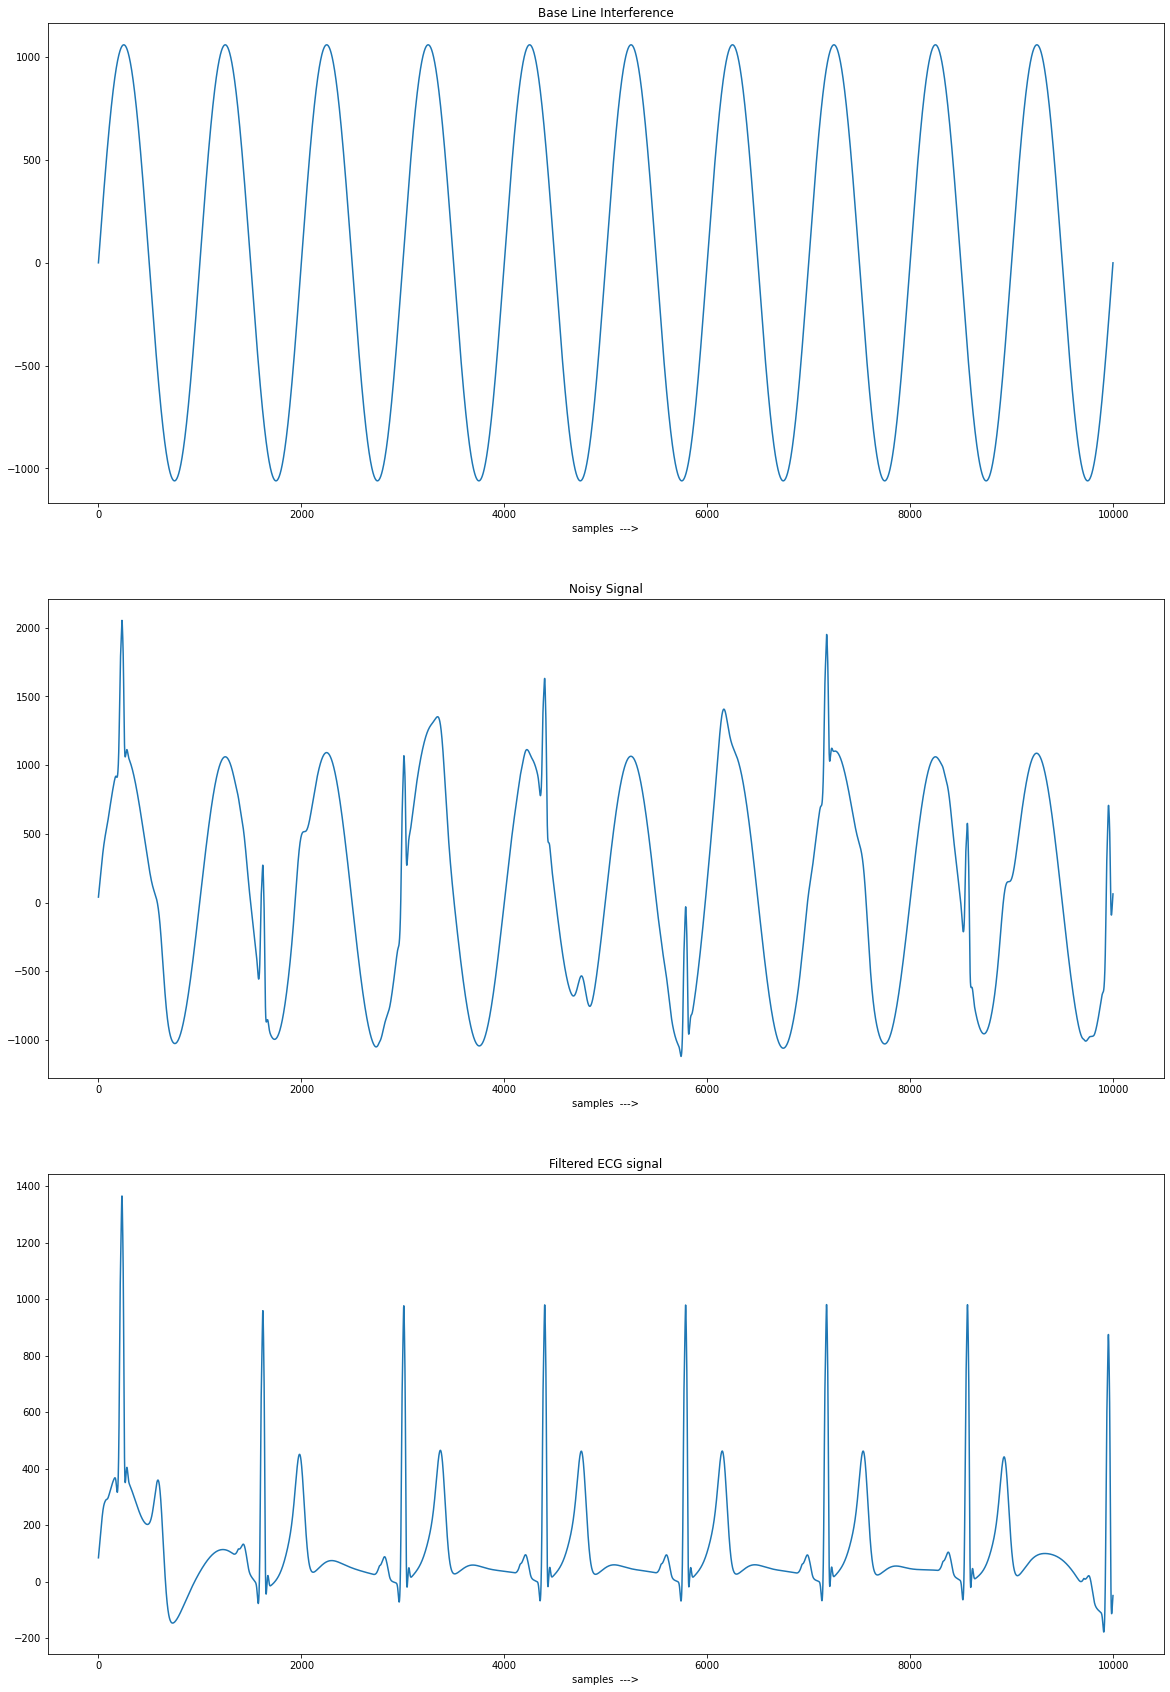

In [41]:
t=np.linspace(0,10,10000)
baseline_int=(max(ecg)-min(ecg))*np.sin(2*np.pi*t)
noisy_ecg=ecg+baseline_int
plt.figure(1,figsize=(20,30))
plt.subplot(3,1,1)
plt.plot(baseline_int)
plt.title("Base Line Interference")
plt.xlabel("samples  --->")

plt.subplot(3,1,2)
plt.plot(noisy_ecg)
plt.title("Noisy Signal")
plt.xlabel("samples  --->")


b,a=scipy.signal.iirnotch(1, 2, fs=fs)
output_signal=scipy.signal.filtfilt(b,a,noisy_ecg)
plt.subplot(3,1,3)
plt.plot(output_signal)
plt.title("Filtered ECG signal")
plt.xlabel("samples  --->")

prd=np.sqrt(np.sum((output_signal-ecg)**2)/np.sum(ecg**2))*10
print("PRD value of iir notch filter is:  ",prd)

PRD value of mean_median filter is:   9.987620040255026
PRD value of mean_median filter is:   7.65120164902312


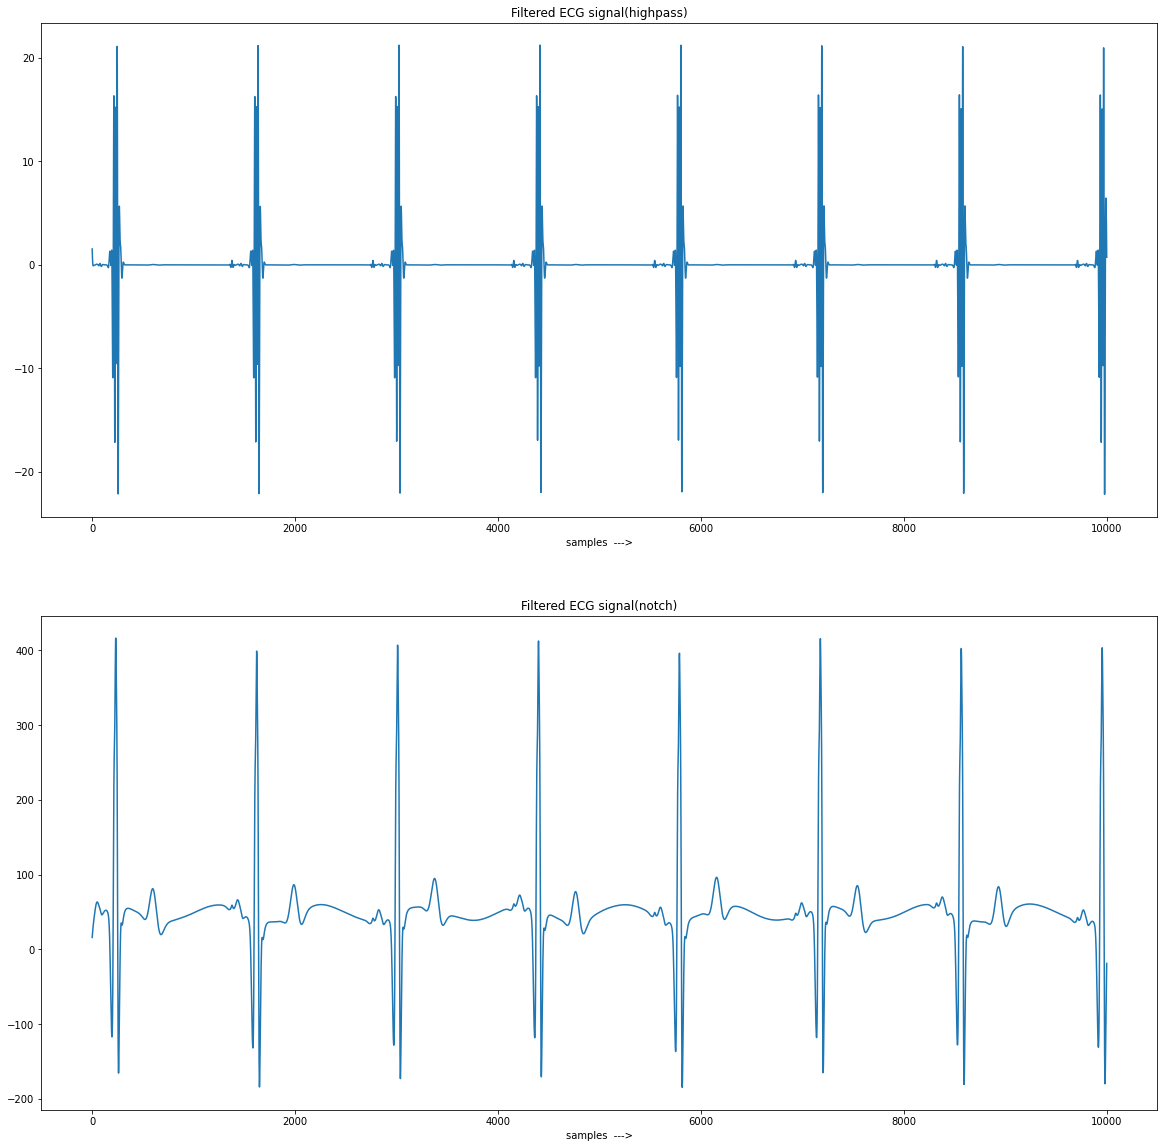

In [40]:
import heartpy as hp
filter1 = hp.filter_signal(noisy_ecg,cutoff=0.5, sample_rate =10, filtertype='highpass')
filter2 = hp.remove_baseline_wander(noisy_ecg,sample_rate=1000,cutoff=0.05)
plt.figure(1,figsize=(20,20))
plt.subplot(2,1,1)
plt.plot(filter1)
plt.title("Filtered ECG signal(highpass)")
plt.xlabel("samples  --->")
prd=np.sqrt(np.sum((filter1-ecg)**2)/np.sum(ecg**2))*10
print("PRD value of highpass filter is:  ",prd)
plt.subplot(2,1,2)
plt.plot(filter2)
plt.title("Filtered ECG signal(notch)")
plt.xlabel("samples  --->")
prd=np.sqrt(np.sum((filter2-ecg)**2)/np.sum(ecg**2))*10
print("PRD value of notch filter is:  ",prd)

In [ ]:
#Loading Data
data = sio.loadmat('original_ECG.mat')
ecg=np.array(data['original'][0])
ecg=ecg[0:100]

Text(0.5, 1.0, 'Plot of DFT')

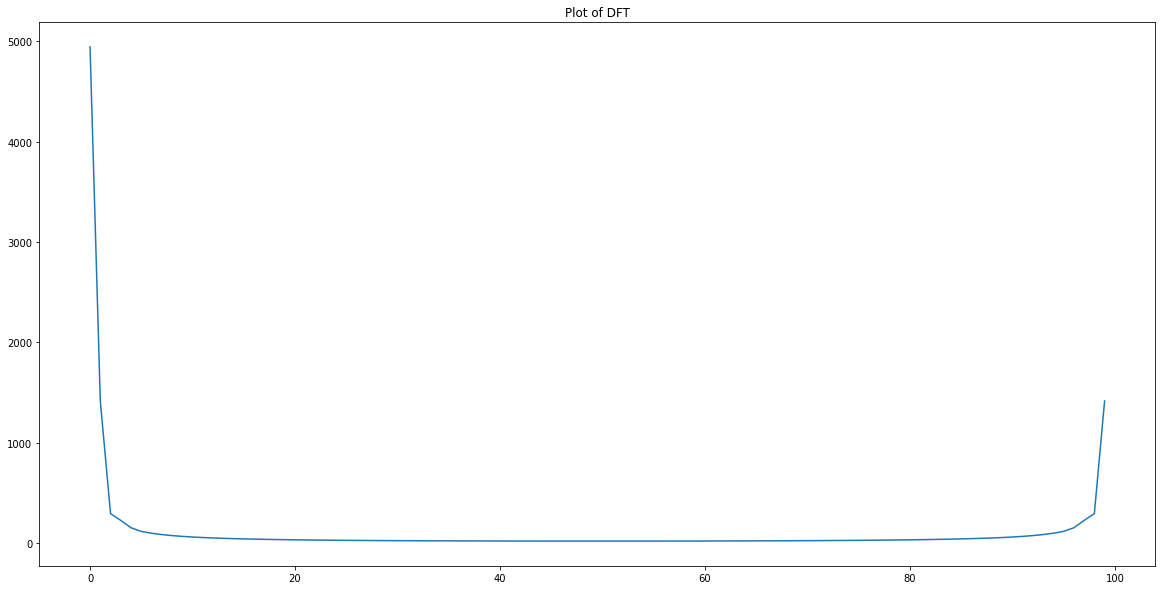

In [ ]:
#Plot of ecg signal
X=fft(ecg)

plt.figure(1,figsize=(20,10))
plt.plot(np.abs(X))
plt.title("Plot of DFT")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


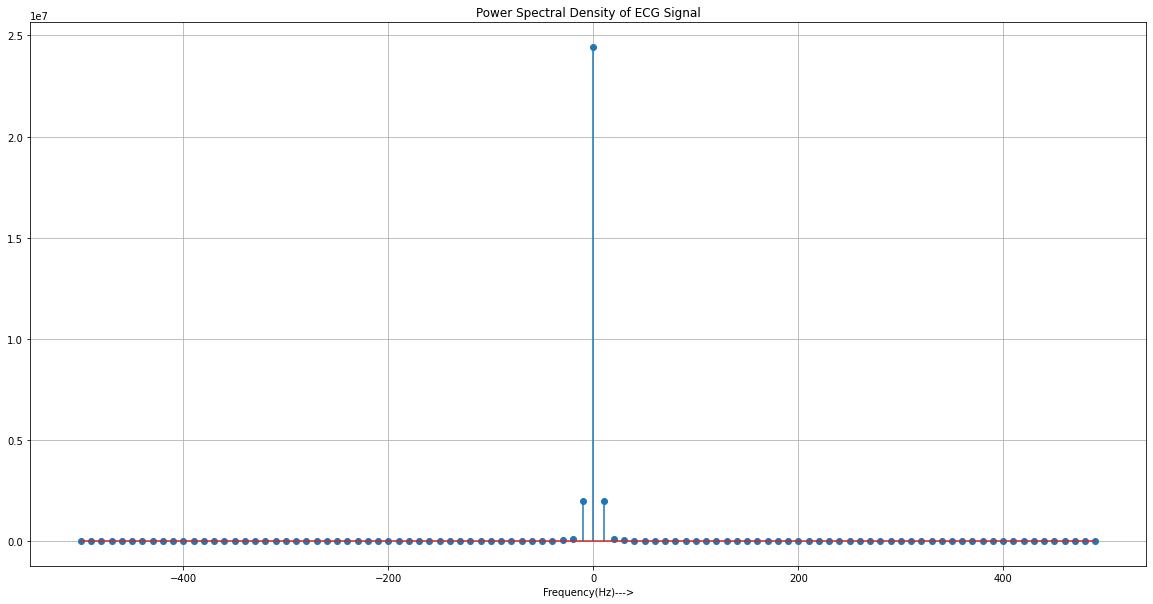

In [ ]:
N=len(ecg)
freq = np.fft.fftfreq(N, d=0.001)
k=np.arange(0,N,1,dtype=int)
psd=np.zeros_like(k)
for i in k:
  psd[i]=abs(X[i])**2

plt.figure(1,figsize=(20,10))
plt.stem(freq,psd)
plt.title("Power Spectral Density of ECG Signal")
plt.xlabel("Frequency(Hz)--->")
plt.grid(True)

Hanning Window

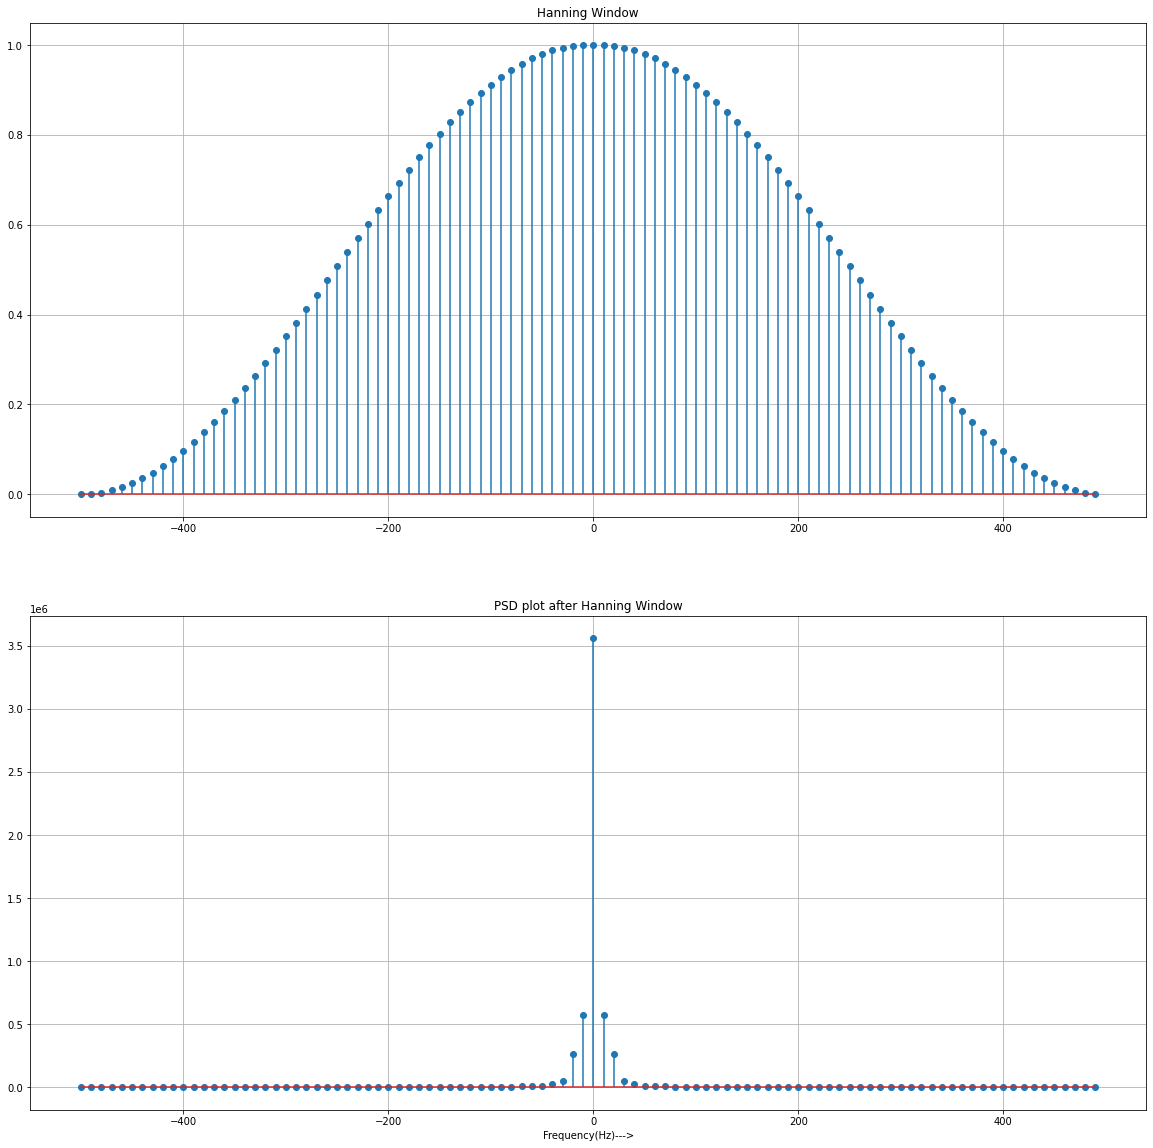

In [ ]:
def hanning(M):
  return [0.5 -0.5*np.cos((2*np.pi*i)/(M-1)) for i in range(-M//2,M//2)]

x=ecg*hanning(len(ecg))
X=fft(x) 
N=len(ecg)
k=np.arange(0,N,1,dtype=int)
psd=np.zeros_like(k)
for i in k:
  psd[i]=abs(X[i])**2

plt.figure(1,figsize=(20,20))
plt.subplot(2,1,1)
plt.stem(freq,hanning(len(ecg)),use_line_collection=True)
plt.grid(True)
plt.title("Hanning Window")
plt.subplot(2,1,2)
plt.stem(freq,psd,use_line_collection=True)
plt.title("PSD plot after Hanning Window")
plt.xlabel("Frequency(Hz)--->")
plt.grid(True)

Hamming Window

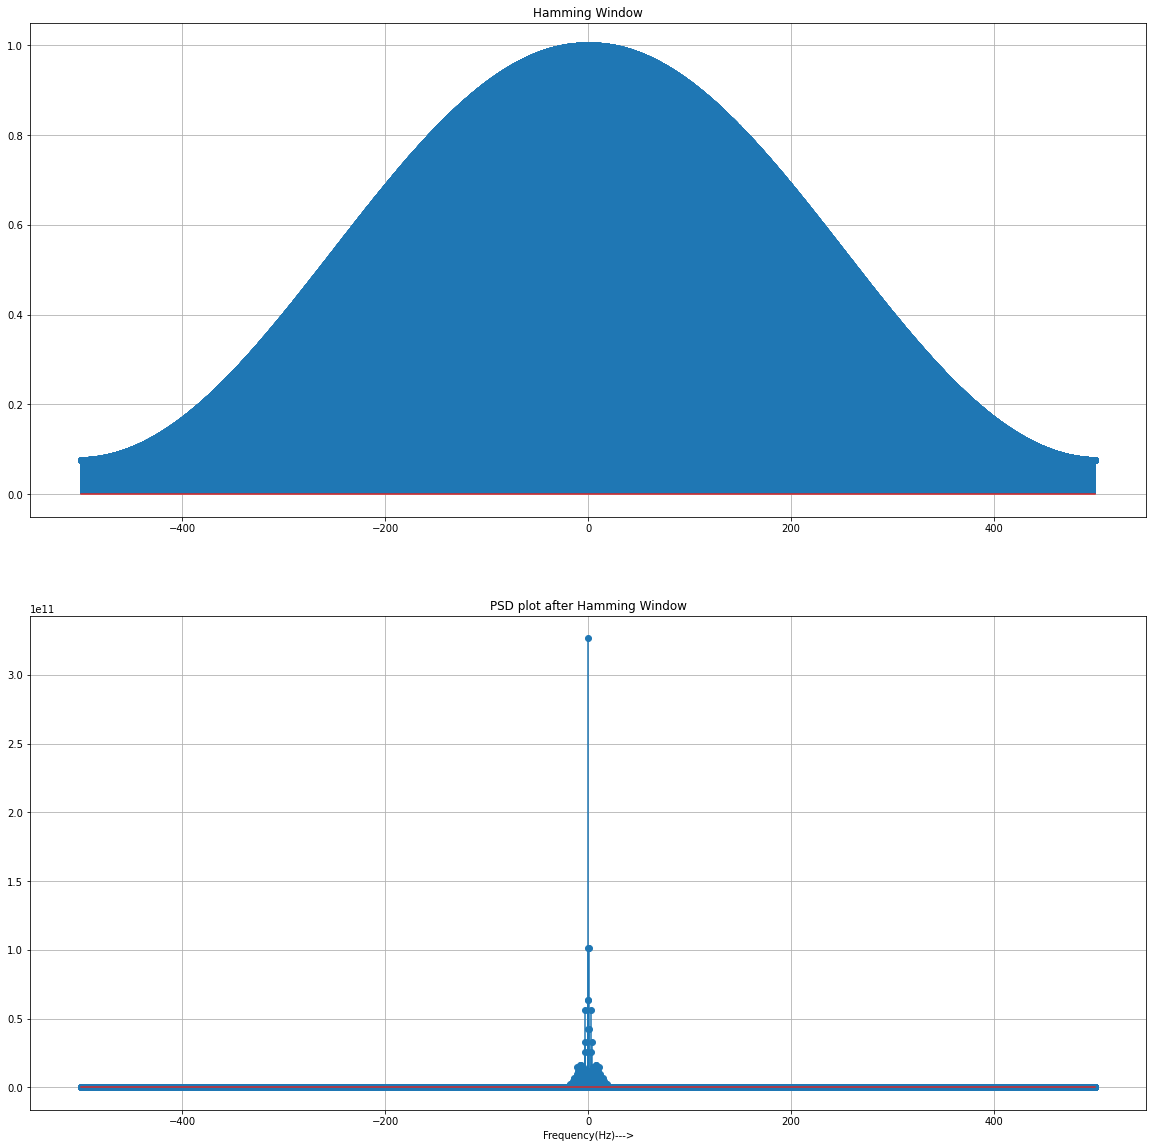

In [ ]:
def hamming(M):
  return [0.53836 -0.46164*np.cos((2*np.pi*i)/(M-1)) for i in range(-M//2,M//2)]

x=ecg*hamming(len(ecg))
X=fft(x) 
N=len(ecg)
k=np.arange(0,N,1,dtype=int)
psd=np.zeros_like(k)
for i in k:
  psd[i]=abs(X[i])**2


plt.figure(1,figsize=(20,20))
plt.subplot(2,1,1)
plt.stem(freq,hamming(len(ecg)),use_line_collection=True)
plt.grid(True)
plt.title("Hamming Window")
plt.subplot(2,1,2)
plt.stem(freq,psd,use_line_collection=True)
plt.title("PSD plot after Hamming Window")
plt.xlabel("Frequency(Hz)--->")
plt.grid(True)

Bartlett Window

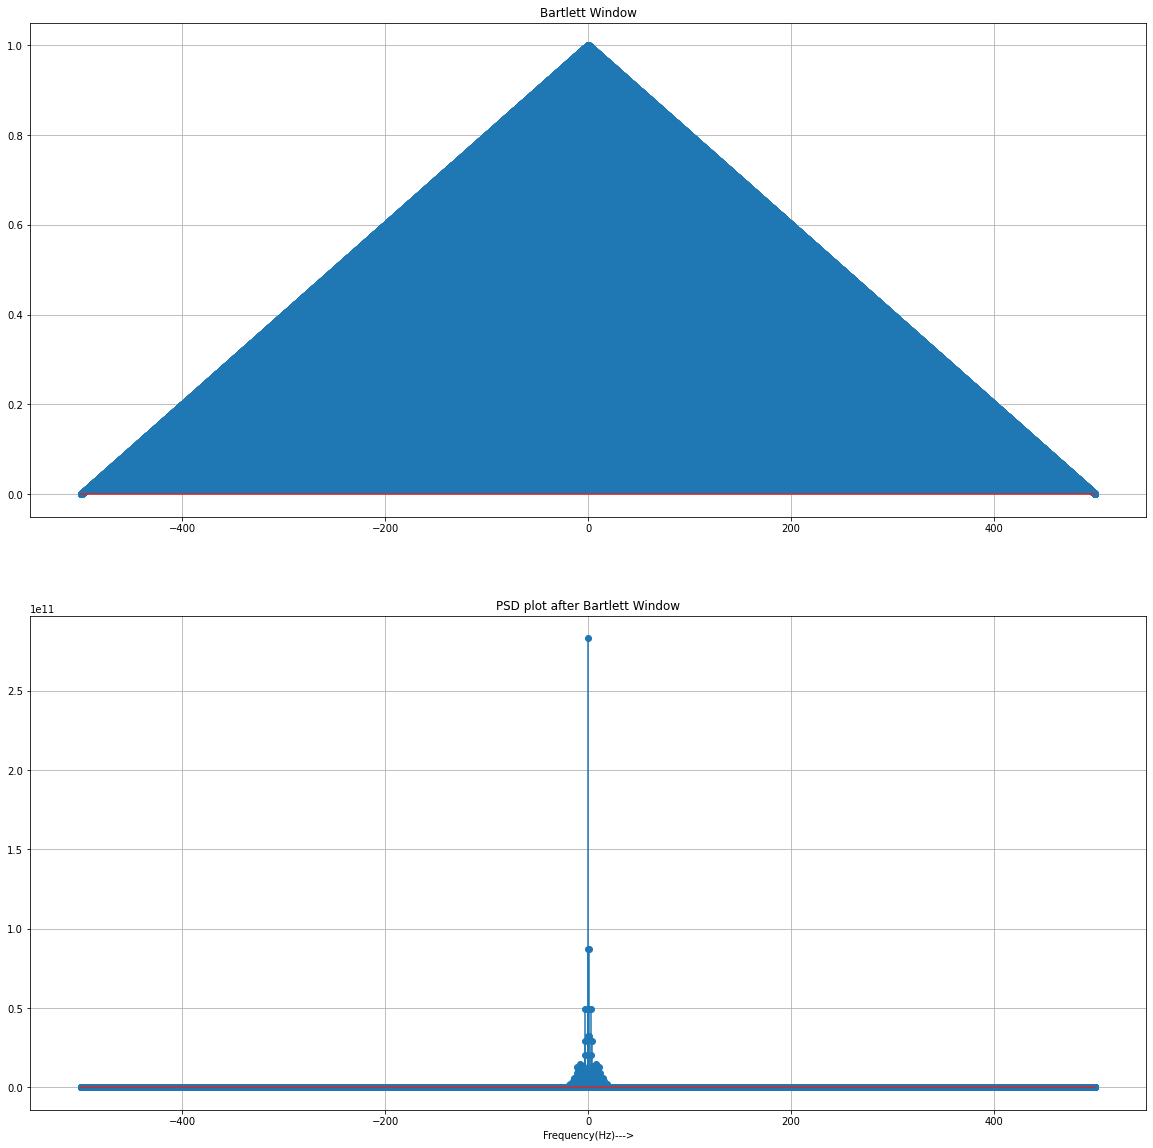

In [ ]:
def bartlett(M):
  m=(M-1)/2
  return [abs((1/m)*(m-abs(i-m))) for i in range(-M//2,M//2)]

x=ecg*bartlett(len(ecg))
X=fft(x) 
N=len(ecg)
k=np.arange(0,N,1,dtype=int)
psd=np.zeros_like(k)
for i in k:
  psd[i]=abs(X[i])**2


plt.figure(1,figsize=(20,20))
plt.subplot(2,1,1)
plt.stem(freq,bartlett(len(ecg)),use_line_collection=True)
plt.grid(True)
plt.title("Bartlett Window")
plt.subplot(2,1,2)
plt.stem(freq,psd,use_line_collection=True)
plt.title("PSD plot after Bartlett Window")
plt.xlabel("Frequency(Hz)--->")
plt.grid(True)

In [2]:
from scipy.fft import fft,ifft,dct,idct

#Inverse Discrete Fourier Transform
\begin{equation}x[n] =\frac{1}N\displaystyle\sum_{k=0}^{N-1}X(k)*e^{j(2*pi/N)kn}\end{equation}

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Energy of ECG reconstructed from 80% DFT coeff:   138093020.63186052
Energy of ECG reconstructed from 60% DFT coeff:   184120447.7146312
Energy of ECG reconstructed from 40% DFT coeff:   276177233.6180099


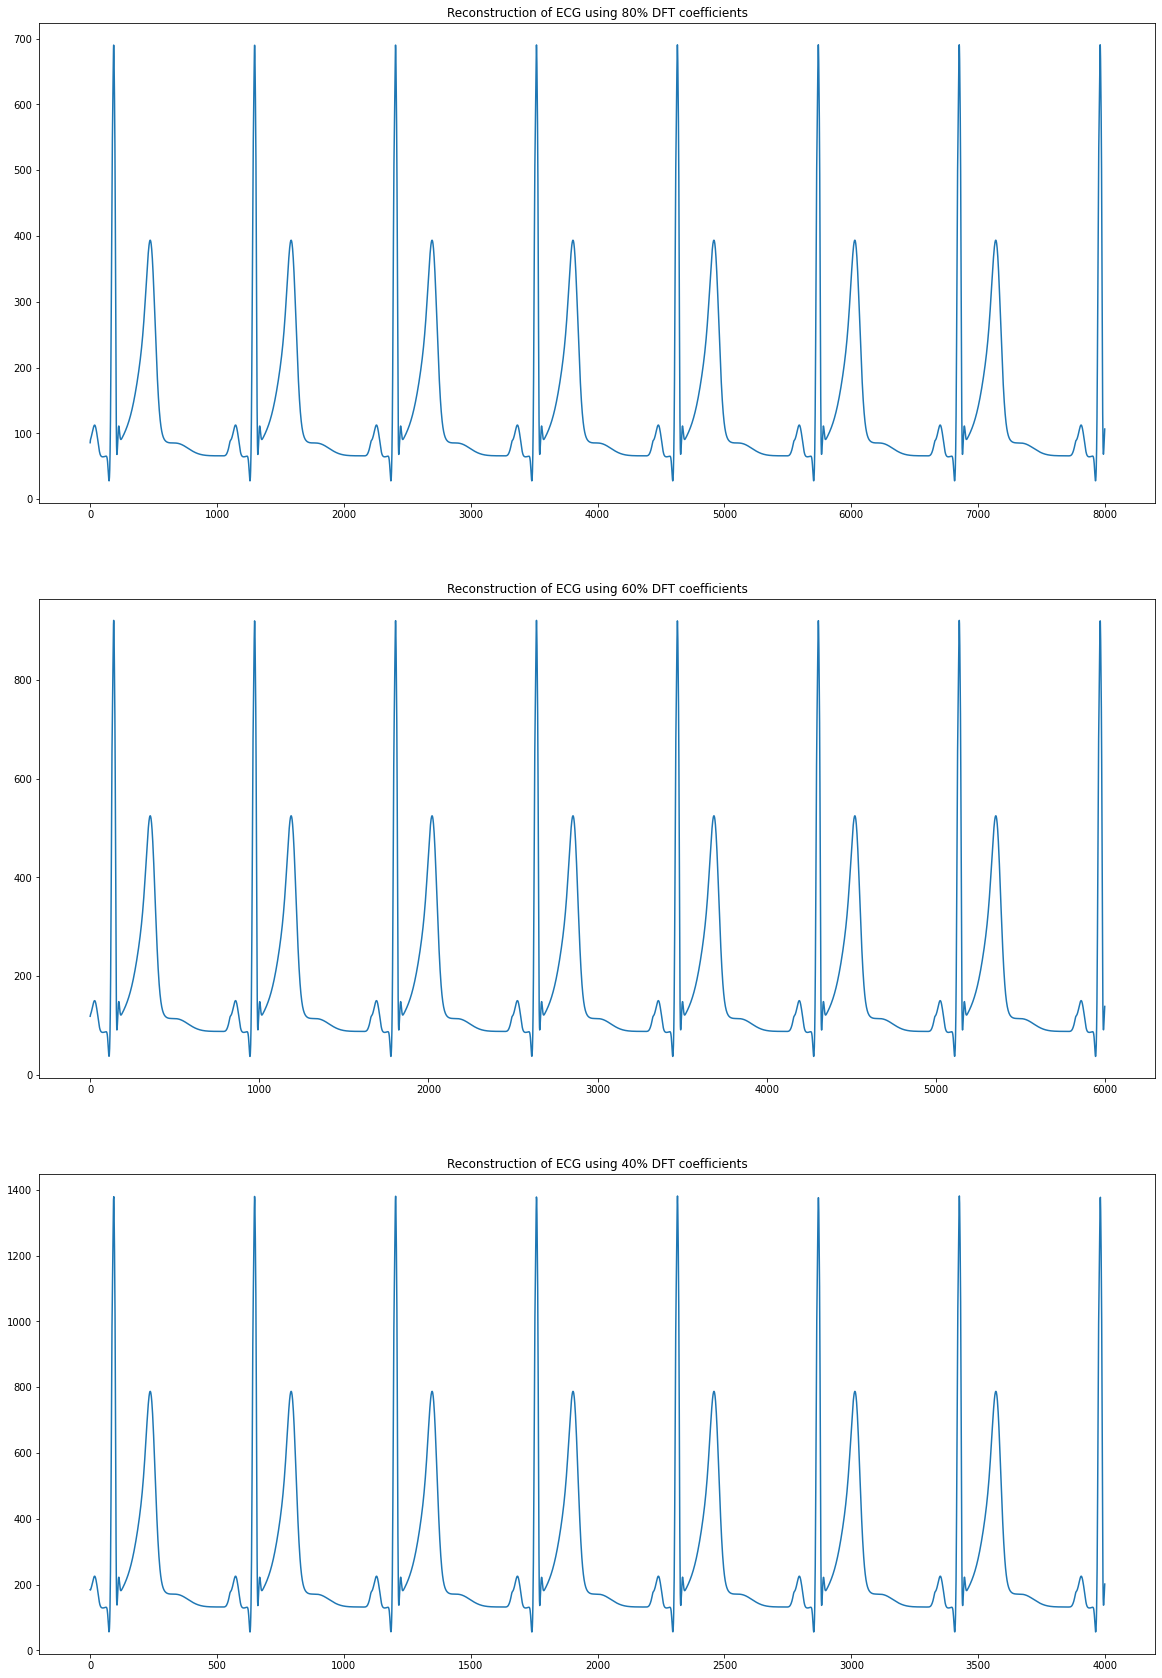

In [12]:
X=fft(ecg)


x_80=ifft(X[0:int(0.8*len(X))])
x_60=ifft(X[0:int(0.6*len(X))])
x_40=ifft(X[0:int(0.4*len(X))])


plt.figure(1,figsize=(20,30))
plt.subplot(3,1,1)
plt.plot(x_80)
plt.title("Reconstruction of ECG using 80% DFT coefficients")
energy=np.sum(x_80**2)
print("Energy of ECG reconstructed from 80% DFT coeff:  ",abs(energy))


plt.subplot(3,1,2)
plt.plot(x_60)
plt.title("Reconstruction of ECG using 60% DFT coefficients")
energy=np.sum(x_60**2)
print("Energy of ECG reconstructed from 60% DFT coeff:  ",abs(energy))


plt.subplot(3,1,3)
plt.plot(x_40)
plt.title("Reconstruction of ECG using 40% DFT coefficients")
energy=np.sum(x_40**2)
print("Energy of ECG reconstructed from 40% DFT coeff:  ",abs(energy))

#Discrete Cosine Transform
\begin{equation}X(m) =\sqrt{\frac{2}{N}}\displaystyle\sum_{n=0}^{N-1}x[n]c_{m}cos{[\frac{pi*m}{2N}(2n+1)]}\end{equation}

Text(0.5, 1.0, 'Plot of DCT')

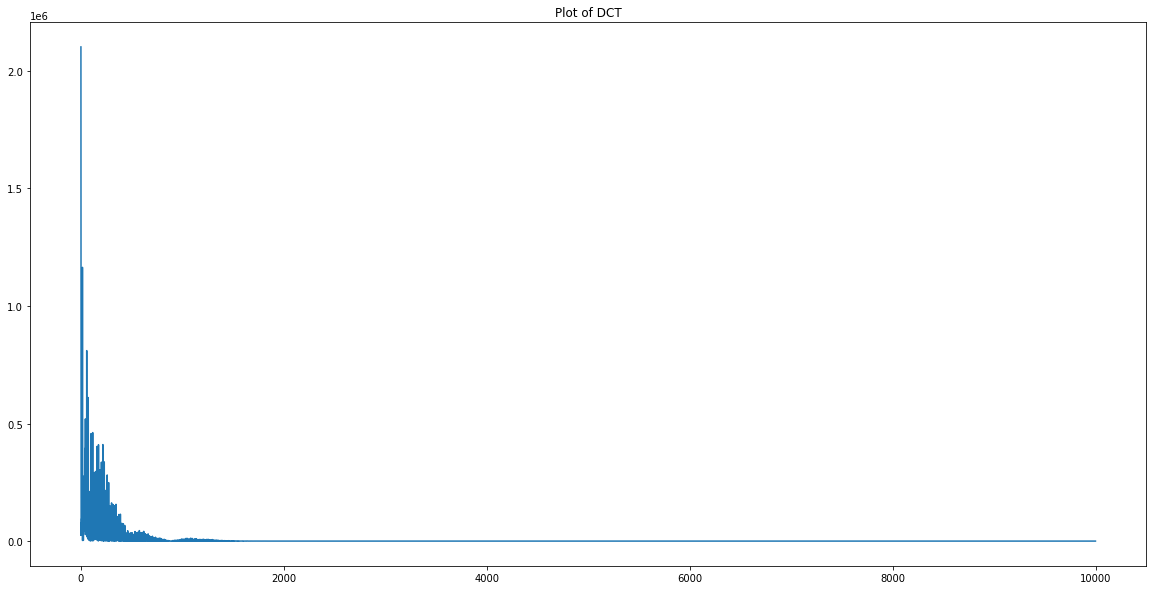

In [ ]:
#Plot of ecg signal
X=dct(ecg)

plt.figure(1,figsize=(20,10))
plt.plot(np.abs(X))
plt.title("Plot of DCT")

#Inverse Discrete Cosine Transform
\begin{equation}x[n] =\sqrt{\frac{2}{N}}\displaystyle\sum_{m=0}^{N-1}X(m)c_{m}cos{[\frac{pi*m}{2N}(2n+1)]}\end{equation}

Energy of ECG reconstructed from 80% DCT coeff   552197223.4468524
Energy of ECG reconstructed from 60% DCT coeff   736262964.4084923
Energy of ECG reconstructed from 40% DCT coeff   1104394444.8069086


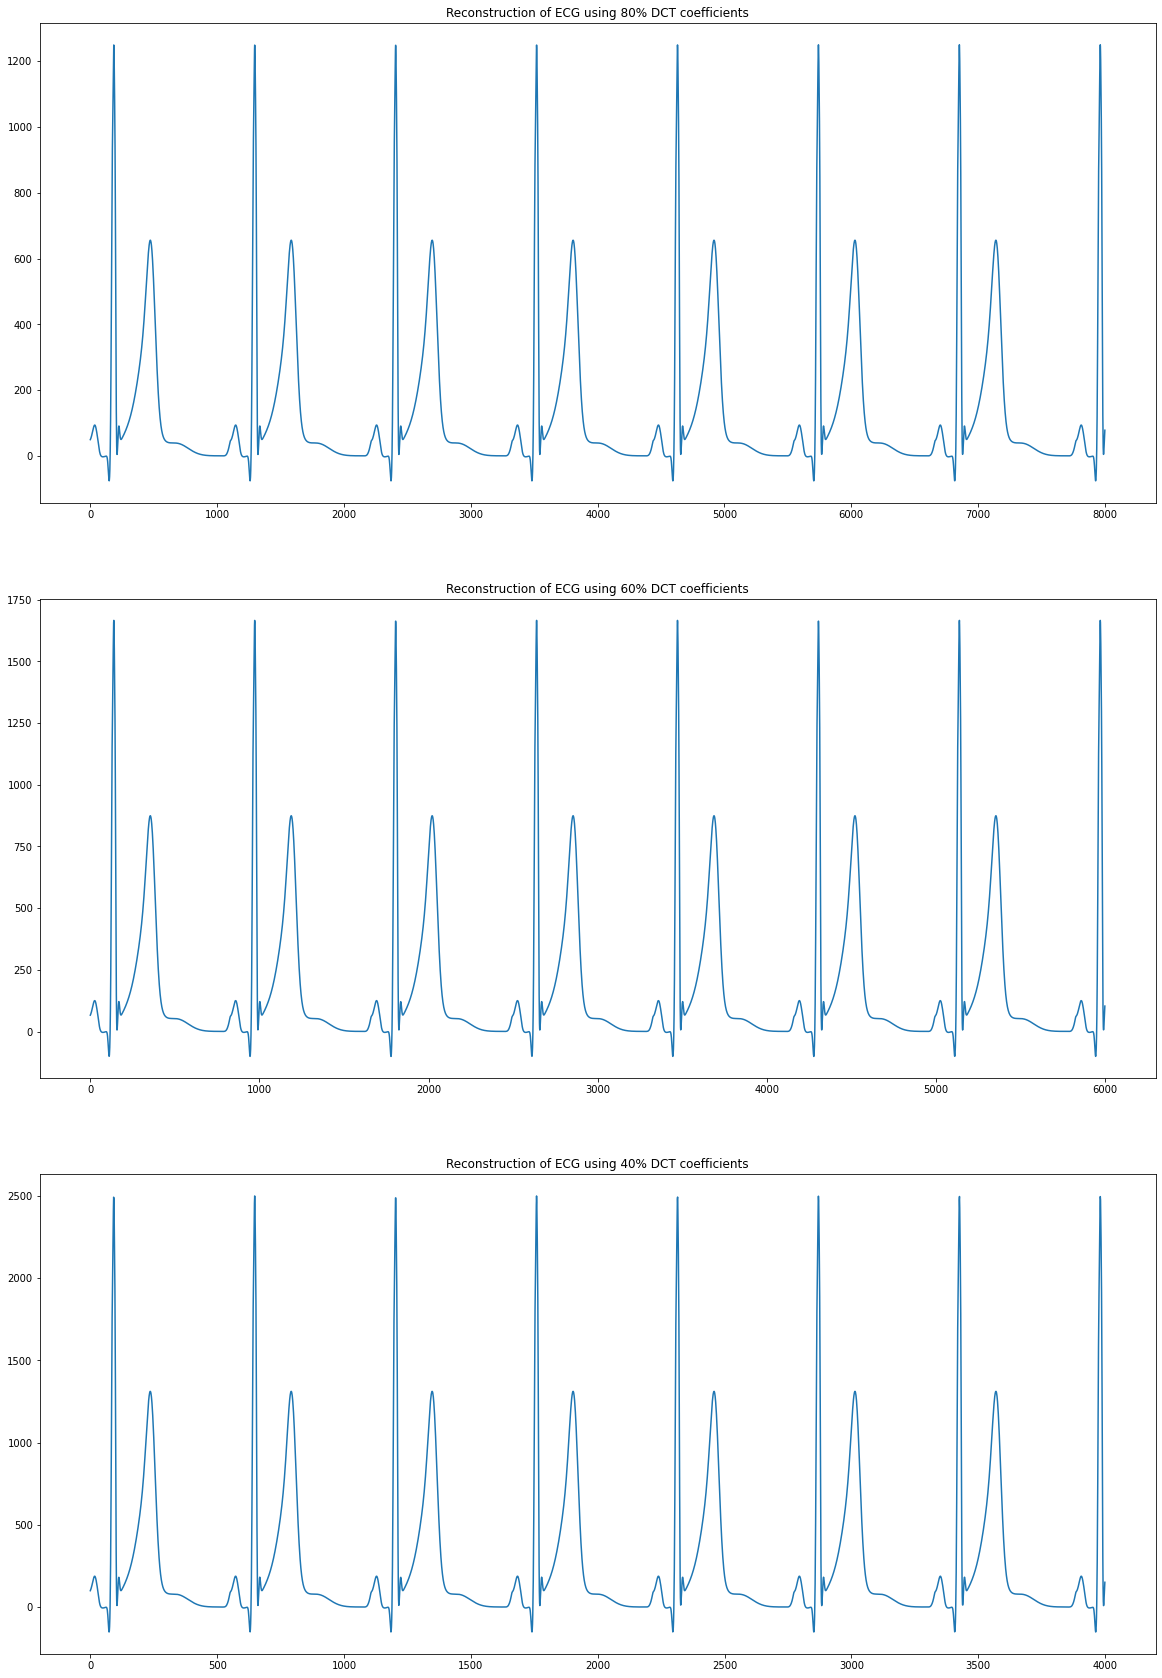

In [14]:
X_dct=dct(ecg)


x_80=idct(X_dct[0:int(0.8*len(X_dct))])
x_60=idct(X_dct[0:int(0.6*len(X_dct))])
x_40=idct(X_dct[0:int(0.4*len(X_dct))])


plt.figure(1,figsize=(20,30))
plt.subplot(3,1,1)
plt.plot(x_80)
plt.title("Reconstruction of ECG using 80% DCT coefficients")
energy=np.sum(x_80**2)
print("Energy of ECG reconstructed from 80% DCT coeff  ",abs(energy))

plt.subplot(3,1,2)
plt.plot(x_60)
plt.title("Reconstruction of ECG using 60% DCT coefficients")
energy=np.sum(x_60**2)
print("Energy of ECG reconstructed from 60% DCT coeff  ",abs(energy))

plt.subplot(3,1,3)
plt.plot(x_40)
plt.title("Reconstruction of ECG using 40% DCT coefficients")
energy=np.sum(x_40**2)
print("Energy of ECG reconstructed from 40% DCT coeff  ",abs(energy))

In [44]:
import pywt
from pywt import wavedecn, waverecn

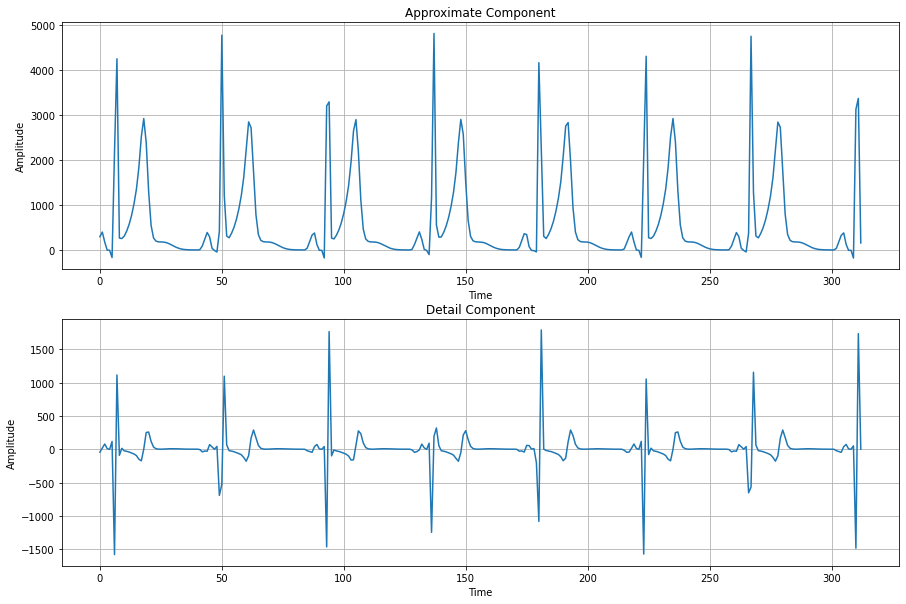

In [45]:
approximate_heavisine = pywt.downcoef('a',ecg, 'db1', mode='sym', level=5)
detail_heavisine = pywt.downcoef('d',ecg, 'db1', mode='sym', level=5)

components = [approximate_heavisine,detail_heavisine]
name = ["Approximate","Detail"]
fig, axs = plt.subplots(2,1, figsize=(15,10))
c =1
for k in range(len(components)):
    plt.subplot(2,1,c)
    plt.plot(components[k])
    plt.title(str(name[k])+" Component")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid()
    c =c+1

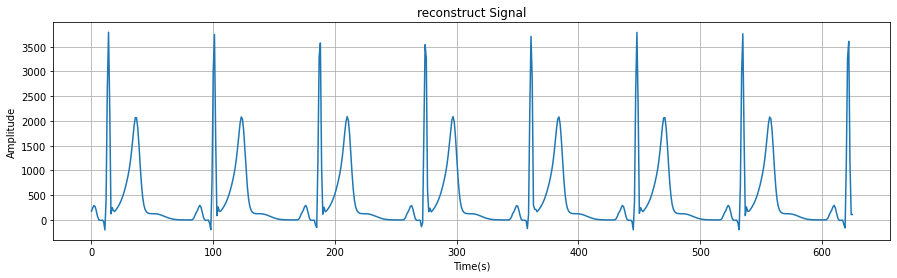

In [48]:
#Reconstructing signal
reconstruct_signal= pywt.idwt(approximate_heavisine,detail_heavisine, wavelet='db1', mode='symmetric', axis = -1)
fig =plt.figure(figsize=(15,4))
plt.plot(reconstruct_signal)
plt.title("Reconstructed Signal")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()